# ANN을 이용한 MNIST 학습
# 임베디드시스템 및 IoT로의 활용 2분반

## 32184074 컴퓨터공학과 정민준
## 2023/03/22

## Library

In [75]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from keras.layers import Dense
from keras.models import Sequential

## Prepare Data
Preparing Training Data

In [76]:
from keras.datasets import mnist #데이터셋

In [77]:
(X_train, Y_train), (X_test,Y_test) = mnist.load_data()

In [78]:
print("Training Data shape: ", X_train.shape)
print("Training label shape: ", Y_train.shape)

print("Test Data shape: ", X_test.shape)
print("Test label shape: ", Y_test.shape)

Training Data shape:  (60000, 28, 28)
Training label shape:  (60000,)
Test Data shape:  (10000, 28, 28)
Test label shape:  (10000,)


In [79]:
#정규화(Normalization)
X_train = X_train.reshape(60000, 28*28).astype('float32')/255.0
X_test = X_test.reshape(10000, 28*28).astype('float32')/255.0

In [80]:
#원-핫 인코딩(One-Hot Encoding)
Y_train = keras.utils.to_categorical(Y_train,10)
Y_test = keras.utils.to_categorical(Y_test,10)

## Design Model

In [81]:
model = Sequential()

model.add(Dense(units=32, input_dim=(28*28), activation='relu')) #hidden layer:32, input layer: 28*28=784
model.add(Dense(units=16, activation='relu')) #hidden layer:16
model.add(Dense(units=10, activation='softmax')) #output layer: 10(0~9)

model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

history = model.fit(X_train,Y_train, batch_size=16, epochs=5, validation_split=0.2)

Epoch 1/5
3000/3000 [==============================] - 12s 4ms/step - loss: 0.3554 - accuracy: 0.8948 - val_loss: 0.1947 - val_accuracy: 0.9447
Epoch 2/5
3000/3000 [==============================] - 9s 3ms/step - loss: 0.1684 - accuracy: 0.9491 - val_loss: 0.1480 - val_accuracy: 0.9557
Epoch 3/5
3000/3000 [==============================] - 10s 3ms/step - loss: 0.1293 - accuracy: 0.9608 - val_loss: 0.1401 - val_accuracy: 0.9587
Epoch 4/5
3000/3000 [==============================] - 10s 3ms/step - loss: 0.1066 - accuracy: 0.9680 - val_loss: 0.1331 - val_accuracy: 0.9617
Epoch 5/5
3000/3000 [==============================] - 9s 3ms/step - loss: 0.0917 - accuracy: 0.9723 - val_loss: 0.1191 - val_accuracy: 0.9656


In [82]:
model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_34 (Dense)            (None, 32)                25120     
                                                                 
 dense_35 (Dense)            (None, 16)                528       
                                                                 
 dense_36 (Dense)            (None, 10)                170       
                                                                 
Total params: 25,818
Trainable params: 25,818
Non-trainable params: 0
_________________________________________________________________


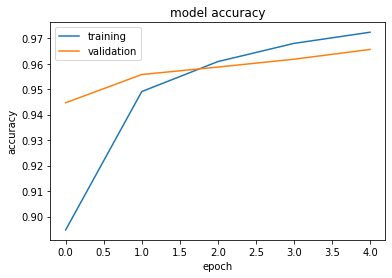

In [83]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['training', 'validation'], loc='best')
plt.show()

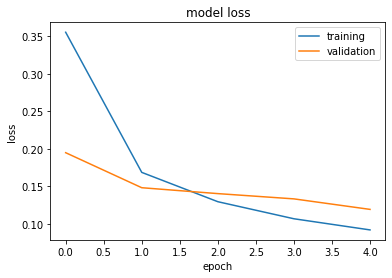

In [84]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['training', 'validation'], loc='best')
plt.show()

In [85]:
loss, accuracy = model.evaluate(X_test, Y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.1159 - accuracy: 0.9655
